# Imports and path preparations

In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import sys
import os

# Get the absolute path to the 'src' directory
sys.path.append(os.path.abspath(".."))
print(os.path.abspath(".."))
project_root = os.path.abspath("..")
print(sys.path)
print(project_root)

/home/julia/school/bakalarka/hospital_sim
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages', '/home/julia/school/bakalarka/hospital_sim']
/home/julia/school/bakalarka/hospital_sim


In [3]:
from src.main import App
from data_generator import DataGenerator
from src.process_data import DataProcessor

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
exp_layout = project_root + "/input/experiments/layouts/expLayout.json"
two_nurses = project_root + "/input/experiments/people/expTwoNurses.json" #two nurses, 4 patients each, 2 patients per room
one_nurse = project_root + "/input/experiments/people/expOneNurse.json" #one nurse, 8 patients, 2 patients per room
exp_nurse_log = project_root + "/output/expNurseLog.csv"
exp_event_log = project_root + "/output/expEventLog.csv"
event_paths = ["expEvents1.json",
"expEvents2.json",
"expEvents3.json",
"expEvents4.json",
"expEvents5.json",
"expEvents6.json",
"expEvents7.json",
"expEvents8.json",]
full_event_paths = list(map(lambda x: project_root + "/input/experiments/events/" + x, event_paths))

In [5]:
# full_event_paths = list(map(lambda x: project_root + "/input/experiments/events/" + x, event_paths))
print(full_event_paths)


['/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents1.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents2.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents3.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents4.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents5.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents6.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents7.json', '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents8.json']


In [5]:
params1 = {"event_path" : full_event_paths[0], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": True}
params2 = {"event_path" : full_event_paths[1], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": True}
params3 = {"event_path" : full_event_paths[2], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": True}
params4 = {"event_path" : full_event_paths[3], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": True}
params5 = {"event_path" : full_event_paths[4], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": False}
params6 = {"event_path" : full_event_paths[5], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": False}
params7 = {"event_path" : full_event_paths[6], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": False}
params8 = {"event_path" : full_event_paths[7], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": False}
params_lst = [params1, params2, params3, params4, params5, params6, params7, params8]

# Functions for experiment generation and running

In [6]:
def generate_exp(params):
    # exp_events = project_root + "/input/events/" + exp_event_path
    # if nurse_cnt == 1:
    #     people_file = one_nurse
    # elif nurse_cnt == 2:
    #     people_file = two_nurses
    event_gen = DataGenerator(rnd=42, layout_file=exp_layout, people_file=params["people_path"], out_file=params["event_path"], request_assigner=params["request_assigner"],
                               include_plans=params["include_plans"])
    event_gen.create_events() 

In [7]:
def run_exp(params):
    app = App(exp_layout, params["people_path"], params["event_path"], exp_nurse_log, exp_event_log)
    app.run_simulation()

In [8]:
def process_nurse_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(params["nurse_cnt"]):
        nurse_results = {}
        nurse_results["nurse_dst_walked"] = dp.nurse_dst_walked(i)
        nurse_results["nurse_time_walked"] = dp.nurse_time_walked(i)
        nurse_results["nurse_time_at_own_patients"] = dp.nurse_time_at_own_patients(i)
        nurse_results["nurse_time_at_other_patients"] = dp.nurse_time_at_other_patients(i)
        nurse_results["nurse_time_resting"] = dp.nurse_time_resting(i)
        all_results.append(nurse_results)
    return all_results

In [9]:
def process_patient_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(8):
        patient_results = []
        for lvl in range(4):
            if lvl == 0:
                lvl = None

            level_results = {}
            level_results["total_time_waiting"] = dp.patient_total_time_waiting(i, lvl)
            level_results["avg_time_waiting"] = dp.patient_avg_time_waiting(i, lvl) #could be changed to histogram somehow
            patient_results.append(level_results)
        all_results.append(patient_results)
    return all_results


# Running the actual experiments

In [11]:
params1 = params_lst[0]
print(params1)

{'event_path': '/home/julia/school/bakalarka/hospital_sim/input/experiments/events/expEvents1.json', 'nurse_cnt': 2, 'people_path': '/home/julia/school/bakalarka/hospital_sim/input/experiments/people/expTwoNurses.json', 'request_assigner': 'basic', 'include_plans': True}


In [ ]:
# generating each scenarion once
%%capture
for params in params_lst:
    generate_exp(params)

In [ ]:
# running each scenario once
%%capture
nurse_results = []
patient_results = []
done = []
for i, params in enumerate(params_lst):  
    run_exp(params)
    done.append(i)
    exp_results_nurse = process_nurse_data(params)
    nurse_results.append(exp_results_nurse)
    exp_results_patient = process_patient_data(params)
    patient_results.append(exp_results_patient)

In [18]:
# generating and running each scenario n times
nurse_results = []
patient_results = []
done = []
for i, params in enumerate(params_lst):
    event_gen = DataGenerator(rnd=42, layout_file=exp_layout, people_file=params["people_path"], out_file=params["event_path"], request_assigner=params["request_assigner"],
                               include_plans=params["include_plans"]) #data generator for that particular scenario
    nurse_results_scenario = []
    patient_results_scenario = []
    for _ in range(2):
        event_gen.create_events() 
        run_exp(params)
        done.append(i)
        exp_results_nurse = process_nurse_data(params)
        nurse_results_scenario.append(exp_results_nurse)
        exp_results_patient = process_patient_data(params)
        patient_results_scenario.append(exp_results_patient)
    nurse_results.append(nurse_results_scenario)
    patient_results.append(patient_results_scenario)

{'time': 2867.554752696838, 'patient': 0, 'level': 2, 'duration': 146.9536500409154}
{'time': 2148.660568607353, 'patient': 0, 'level': 2, 'duration': 44.996237372700435}
{'time': 1653.2960110771219, 'patient': 0, 'level': 2, 'duration': 51.43002268829112}
{'time': 2343.1985026158704, 'patient': 0, 'level': 2, 'duration': 138.2998158400237}
{'time': 3378.7897524567006, 'patient': 0, 'level': 2, 'duration': 178.83173389368264}
{'time': 2222.9334346597793, 'patient': 0, 'level': 2, 'duration': 31.059945782957612}
{'time': 83.02473014909673, 'patient': 0, 'level': 2, 'duration': 89.97914575728832}
{'time': 167.99638756901552, 'patient': 0, 'level': 3, 'duration': 64.91570106454563}
{'time': 326.18316431815487, 'patient': 0, 'level': 2, 'duration': 87.3692986900744}
{'time': 2132.692447903353, 'patient': 1, 'level': 2, 'duration': 121.13172778521576}
{'time': 613.8868452742495, 'patient': 1, 'level': 2, 'duration': 172.33283058799998}
{'time': 3476.275319068414, 'patient': 1, 'level': 3, '

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'time': 2891.3031229676253, 'patient': 0, 'level': 2, 'duration': 177.51347113422645}
{'time': 1435.767992800391, 'patient': 0, 'level': 3, 'duration': 149.75176874768266}
{'time': 542.5831582755461, 'patient': 0, 'level': 2, 'duration': 134.3719210186323}
{'time': 3090.0916973293915, 'patient': 0, 'level': 2, 'duration': 63.036157134832244}
{'time': 2560.138316776864, 'patient': 0, 'level': 3, 'duration': 82.2998980937594}
{'time': 346.23558392911474, 'patient': 0, 'level': 3, 'duration': 89.63580316312834}
{'time': 1863.9048618989284, 'patient': 0, 'level': 3, 'duration': 131.3535175558921}
{'time': 2646.77802926678, 'patient': 0, 'level': 2, 'duration': 111.21719607413488}
{'time': 2504.823837642296, 'patient': 0, 'level': 2, 'duration': 56.24323906439042}
{'time': 1859.8892085756513, 'patient': 1, 'level': 2, 'duration': 179.43805496368864}
{'time': 3475.509664639657, 'patient': 1, 'level': 2, 'duration': 162.39545147840096}
{'time': 679.3455900289657, 'patient': 1, 'level': 2, 'd

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.

{'time': 2891.3031229676253, 'patient': 0, 'level': 2, 'duration': 177.51347113422645}
{'time': 1435.767992800391, 'patient': 0, 'level': 3, 'duration': 149.75176874768266}
{'time': 542.5831582755461, 'patient': 0, 'level': 2, 'duration': 134.3719210186323}
{'time': 3090.0916973293915, 'patient': 0, 'level': 2, 'duration': 63.036157134832244}
{'time': 2560.138316776864, 'patient': 0, 'level': 3, 'duration': 82.2998980937594}
{'time': 346.23558392911474, 'patient': 0, 'level': 3, 'duration': 89.63580316312834}
{'time': 1863.9048618989284, 'patient': 0, 'level': 3, 'duration': 131.3535175558921}
{'time': 2646.77802926678, 'patient': 0, 'level': 2, 'duration': 111.21719607413488}
{'time': 2504.823837642296, 'patient': 0, 'level': 2, 'duration': 56.24323906439042}
{'time': 1859.8892085756513, 'patient': 1, 'level': 2, 'duration': 179.43805496368864}
{'time': 3475.509664639657, 'patient': 1, 'level': 2, 'duration': 162.39545147840096}
{'time': 679.3455900289657, 'patient': 1, 'level': 2, 'd

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'time': 2891.3031229676253, 'patient': 0, 'level': 2, 'duration': 177.51347113422645}
{'time': 1435.767992800391, 'patient': 0, 'level': 3, 'duration': 149.75176874768266}
{'time': 542.5831582755461, 'patient': 0, 'level': 2, 'duration': 134.3719210186323}
{'time': 3090.0916973293915, 'patient': 0, 'level': 2, 'duration': 63.036157134832244}
{'time': 2560.138316776864, 'patient': 0, 'level': 3, 'duration': 82.2998980937594}
{'time': 346.23558392911474, 'patient': 0, 'level': 3, 'duration': 89.63580316312834}
{'time': 1863.9048618989284, 'patient': 0, 'level': 3, 'duration': 131.3535175558921}
{'time': 2646.77802926678, 'patient': 0, 'level': 2, 'duration': 111.21719607413488}
{'time': 2504.823837642296, 'patient': 0, 'level': 2, 'duration': 56.24323906439042}
{'time': 1859.8892085756513, 'patient': 1, 'level': 2, 'duration': 179.43805496368864}
{'time': 3475.509664639657, 'patient': 1, 'level': 2, 'duration': 162.39545147840096}
{'time': 679.3455900289657, 'patient': 1, 'level': 2, 'd

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'time': 2867.554752696838, 'patient': 0, 'level': 2, 'duration': 146.9536500409154}
{'time': 2148.660568607353, 'patient': 0, 'level': 2, 'duration': 44.996237372700435}
{'time': 1653.2960110771219, 'patient': 0, 'level': 2, 'duration': 51.43002268829112}
{'time': 2343.1985026158704, 'patient': 0, 'level': 2, 'duration': 138.2998158400237}
{'time': 3378.7897524567006, 'patient': 0, 'level': 2, 'duration': 178.83173389368264}
{'time': 2222.9334346597793, 'patient': 0, 'level': 2, 'duration': 31.059945782957612}
{'time': 83.02473014909673, 'patient': 0, 'level': 2, 'duration': 89.97914575728832}
{'time': 167.99638756901552, 'patient': 0, 'level': 3, 'duration': 64.91570106454563}
{'time': 326.18316431815487, 'patient': 0, 'level': 2, 'duration': 87.3692986900744}
{'time': 2132.692447903353, 'patient': 1, 'level': 2, 'duration': 121.13172778521576}
{'time': 613.8868452742495, 'patient': 1, 'level': 2, 'duration': 172.33283058799998}
{'time': 3476.275319068414, 'patient': 1, 'level': 3, '

## Test prints

In [ ]:
run_exp(params_lst[0])

In [ ]:
res = process_patient_data(params_lst[0])
for i, patient in enumerate(res):
    print(i)
    for lvl in patient:
        print(lvl)

In [22]:
for res in nurse_results:
    print(res)

[[{'nurse_dst_walked': 142.0, 'nurse_time_walked': np.float64(142.0), 'nurse_time_at_own_patients': np.float64(3267.419399976401), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(448.0361894299999)}, {'nurse_dst_walked': 235.65676902744008, 'nurse_time_walked': np.float64(235.6567690274403), 'nurse_time_at_own_patients': np.float64(2696.7678618967393), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(925.0309584822214)}], [{'nurse_dst_walked': 283.78219735829407, 'nurse_time_walked': np.float64(283.7821973582945), 'nurse_time_at_own_patients': np.float64(6506.513299963409), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(801.3740726918982)}, {'nurse_dst_walked': 480.0, 'nurse_time_walked': np.float64(480.0), 'nurse_time_at_own_patients': np.float64(6198.806463578345), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(912.8631064352567)}]]
[[{'nurse_dst_walked': 360.0, 'nurse_time_walked': np.float64(360.0), 'n

In [31]:
for i, exp in enumerate(nurse_results):
    print("\n---------------- EXPERIMENT ", i, "---------------------------")
    for l, run in enumerate(exp):
        print("RUN", l)
        for j, nurse in enumerate(run):
            print("\tnurse", j)
            for k, stat in enumerate(nurse):
                print("\t\t", stat, nurse[stat])


---------------- EXPERIMENT  0 ---------------------------
RUN 0
	nurse 0
		 nurse_dst_walked 142.0
		 nurse_time_walked 142.0
		 nurse_time_at_own_patients 3267.419399976401
		 nurse_time_at_other_patients 0
		 nurse_time_resting 448.0361894299999
	nurse 1
		 nurse_dst_walked 235.65676902744008
		 nurse_time_walked 235.6567690274403
		 nurse_time_at_own_patients 2696.7678618967393
		 nurse_time_at_other_patients 0
		 nurse_time_resting 925.0309584822214
RUN 1
	nurse 0
		 nurse_dst_walked 283.78219735829407
		 nurse_time_walked 283.7821973582945
		 nurse_time_at_own_patients 6506.513299963409
		 nurse_time_at_other_patients 0
		 nurse_time_resting 801.3740726918982
	nurse 1
		 nurse_dst_walked 480.0
		 nurse_time_walked 480.0
		 nurse_time_at_own_patients 6198.806463578345
		 nurse_time_at_other_patients 0
		 nurse_time_resting 912.8631064352567

---------------- EXPERIMENT  1 ---------------------------
RUN 0
	nurse 0
		 nurse_dst_walked 360.0
		 nurse_time_walked 360.0
		 nurse_time

In [21]:
for i, exp in enumerate(patient_results):
    print("\n---------------- EXPERIMENT ", i, "---------------------------")
    for l, run in enumerate(exp):
        print("RUN", l)
        for j, patient in enumerate(run):
            print("\tpatient", j)
            for k, lvl in enumerate(patient):
                print("\t\tlevel", k, lvl)


---------------- EXPERIMENT  0 ---------------------------
RUN 0
	patient 0
		level 0 {'total_time_waiting': np.float64(3293.6861759005383), 'avg_time_waiting': np.float64(365.9651306556153)}
		level 1 {'total_time_waiting': 0, 'avg_time_waiting': np.float64(nan)}
		level 2 {'total_time_waiting': np.float64(3220.7704748359924), 'avg_time_waiting': np.float64(402.59630935449906)}
		level 3 {'total_time_waiting': np.float64(72.91570106454563), 'avg_time_waiting': np.float64(72.91570106454563)}
	patient 1
		level 0 {'total_time_waiting': np.float64(1101.9915893653501), 'avg_time_waiting': np.float64(183.66526489422503)}
		level 1 {'total_time_waiting': 0, 'avg_time_waiting': np.float64(nan)}
		level 2 {'total_time_waiting': np.float64(1026.299523989344), 'avg_time_waiting': np.float64(205.25990479786878)}
		level 3 {'total_time_waiting': np.float64(75.69206537600621), 'avg_time_waiting': np.float64(75.69206537600621)}
	patient 2
		level 0 {'total_time_waiting': np.float64(1451.1111440776

# Plot data

[np.float64(3293.6861759005383), np.float64(1101.9915893653501), np.float64(1451.1111440776754), np.float64(2345.723126856598), np.float64(7755.066204629879), np.float64(1198.2974916400494), np.float64(519.9769934558876), np.float64(326.00725139053156), np.float64(3968.383297117633), np.float64(2283.311195984722), np.float64(2173.5497086666273), np.float64(2926.1240478156988), np.float64(3869.693664034873), np.float64(3793.2527735244266), np.float64(1626.9980501375985), np.float64(965.3283091287296), np.float64(15749.690305949713), np.float64(11699.629128441791), np.float64(9004.87921976143), np.float64(17006.16280577498), np.float64(15603.491435602202), np.float64(13910.948333104205), np.float64(7071.458464273216), np.float64(822.8676992770515), np.float64(28198.042489499585), np.float64(12900.096423416291), np.float64(7026.767264484708), np.float64(20136.00105907484), np.float64(19616.099620900524), np.float64(25041.960399117906), np.float64(6347.561546644375), np.float64(6421.262147

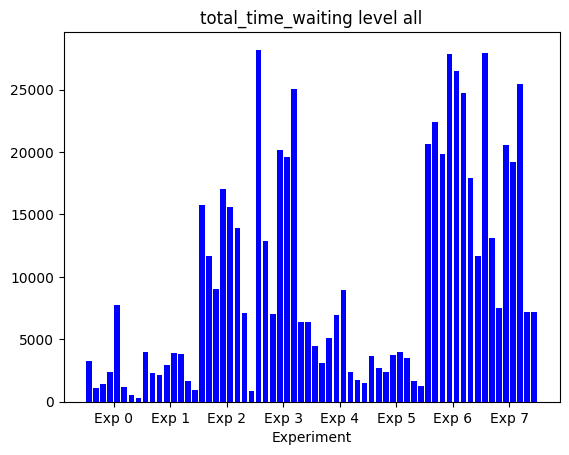

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, np.float64(1113.870726687142), np.float64(2178.6691178549436), np.float64(3641.736491341202), np.float64(4187.635764090652), np.float64(1182.2043439326462), np.float64(1173.2043439326462), np.float64(1196.2043439326462), np.float64(1169.2043439326462), np.float64(249.10665465441207), np.float64(489.63911411453574), np.float64(628.3950267507445), np.float64(936.5388842732925), np.float64(197.0871853695976), np.float64(173.0871853695976), np.float64(384.9820321914316), np.float64(361.9820321914316), np.float64(4910.743062007602), np.float64(10740.506978257916), np.float64(10855.486124015204), np.float64(10839.486124015204), np.float64(10869.486124015204), np.float64(10839.486124015204), np.float64(10859.486124015204), np.float64(10839.486124015204), np.float64(280.7323368898535), np.float64(521.2647963499774), np.float64(660.0207089861862), np.float64(968.1645665087342), np.float64(976.164566

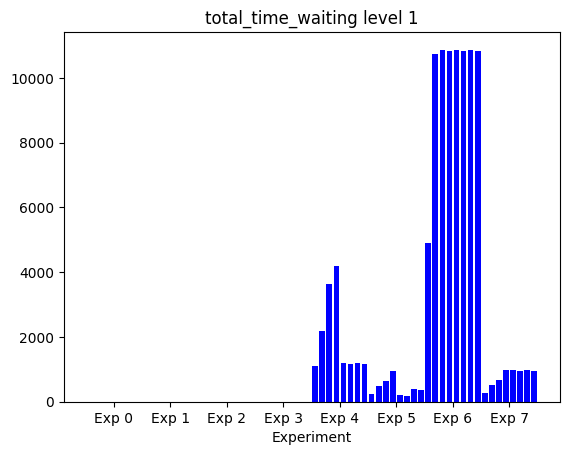

[np.float64(3220.7704748359924), np.float64(1026.299523989344), np.float64(325.6023124601804), np.float64(2199.886411462099), np.float64(7550.164626400929), np.float64(1119.6457384892583), np.float64(439.9598413145949), np.float64(175.95286070059478), np.float64(3890.467596053087), np.float64(2197.6191306087157), np.float64(1913.9957892826992), np.float64(2772.2873324212), np.float64(3639.7920858059215), np.float64(3714.601020373635), np.float64(1545.9808979963059), np.float64(813.0232218112474), np.float64(15676.774604885166), np.float64(11623.937063065785), np.float64(395.38396478496657), np.float64(16860.32609038048), np.float64(15381.589857373248), np.float64(13817.296579953412), np.float64(6991.441312131923), np.float64(667.264941943364), np.float64(21656.06119327775), np.float64(12816.404358040285), np.float64(6767.213345100779), np.float64(19982.16434368034), np.float64(19393.997372369726), np.float64(19735.766774509582), np.float64(6266.544394503082), np.float64(6262.3082255018

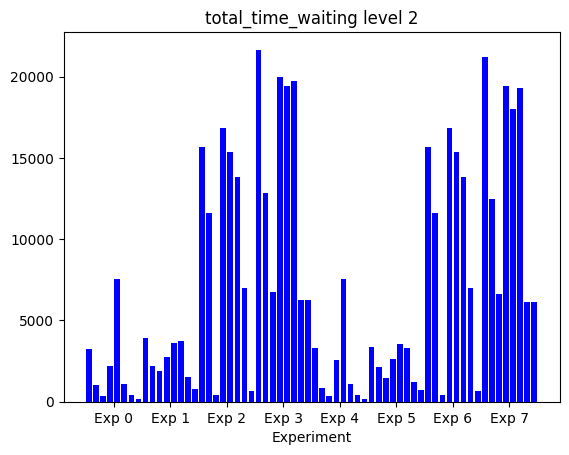

[np.float64(72.91570106454563), np.float64(75.69206537600621), np.float64(1125.508831617495), np.float64(145.83671539449864), np.float64(204.90157822895117), np.float64(78.65175315079114), np.float64(80.01715214129274), np.float64(150.05439068993678), np.float64(77.91570106454563), np.float64(85.69206537600621), np.float64(259.55391938392796), np.float64(153.83671539449864), np.float64(229.90157822895117), np.float64(78.65175315079114), np.float64(81.01715214129274), np.float64(152.30508731748228), np.float64(72.91570106454563), np.float64(75.69206537600621), np.float64(8609.495254976464), np.float64(145.83671539449864), np.float64(221.90157822895117), np.float64(93.65175315079114), np.float64(80.01715214129274), np.float64(155.60275733368758), np.float64(6541.981296221836), np.float64(83.69206537600621), np.float64(259.55391938392796), np.float64(153.83671539449864), np.float64(222.1022485307949), np.float64(5306.193624608323), np.float64(81.01715214129274), np.float64(158.95392232558

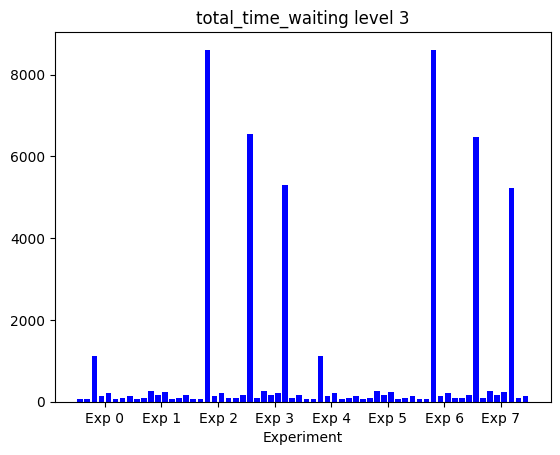

[np.float64(365.9651306556153), np.float64(183.66526489422503), np.float64(362.77778601941884), np.float64(293.2153908570748), np.float64(861.6740227366532), np.float64(149.78718645500618), np.float64(173.32566448529587), np.float64(81.50181284763289), np.float64(440.93147745751475), np.float64(380.55186599745366), np.float64(543.3874271666568), np.float64(365.76550597696234), np.float64(429.96596267054144), np.float64(474.15659669055333), np.float64(542.3326833791995), np.float64(241.3320772821824), np.float64(1749.9655895499682), np.float64(1949.9381880736319), np.float64(2251.2198049403573), np.float64(2125.7703507218725), np.float64(1733.7212706224666), np.float64(1738.8685416380254), np.float64(2357.1528214244054), np.float64(205.71692481926289), np.float64(3133.115832166621), np.float64(2150.016070569382), np.float64(1756.691816121177), np.float64(2517.0001323843544), np.float64(2179.5666245445022), np.float64(3130.245049889738), np.float64(2115.8538488814584), np.float64(1605.31

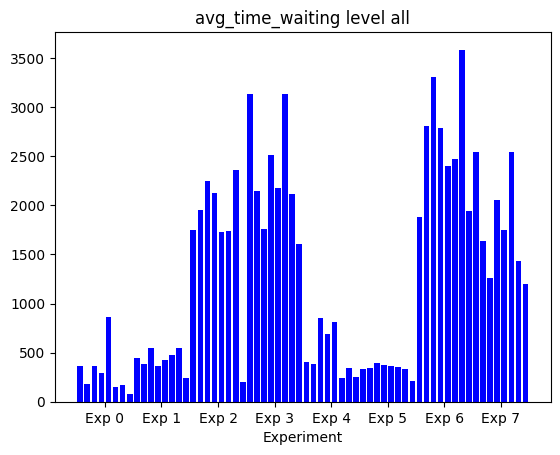

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(556.935363343571), np.float64(1089.3345589274718), np.float64(1820.868245670601), np.float64(2093.817882045326), np.float64(591.1021719663231), np.float64(586.6021719663231), np.float64(598.1021719663231), np.float64(584.6021719663231), np.float64(124.55332732720603), np.float64(244.81955705726787), np.float64(314.19751337537224), np.float64(468.26944213664626), np.float64(98.5435926847988), np.float64(86.5435926847988), np.float64(192.4910

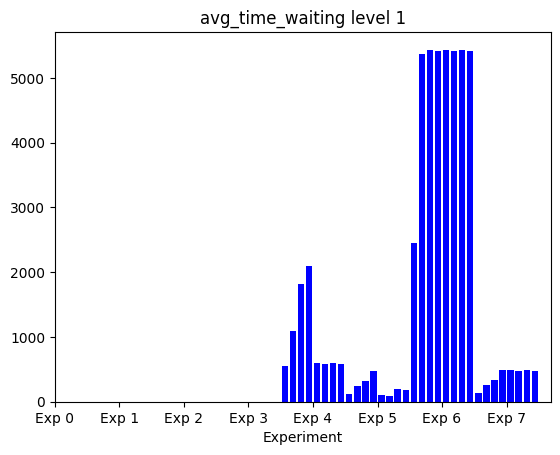

[np.float64(402.59630935449906), np.float64(205.25990479786878), np.float64(162.8011562300902), np.float64(314.26948735172846), np.float64(1078.594946628704), np.float64(159.94939121275118), np.float64(219.97992065729744), np.float64(87.97643035029739), np.float64(486.3084495066359), np.float64(439.5238261217431), np.float64(956.9978946413496), np.float64(396.0410474887429), np.float64(519.9702979722745), np.float64(530.657288624805), np.float64(772.9904489981529), np.float64(406.5116109056237), np.float64(1959.596825610646), np.float64(2324.787412613157), np.float64(197.69198239248328), np.float64(2408.6180129114973), np.float64(2197.3699796247497), np.float64(1973.899511421916), np.float64(3495.7206560659615), np.float64(333.632470971682), np.float64(2707.007649159719), np.float64(2563.280871608057), np.float64(3383.6066725503897), np.float64(2854.594906240048), np.float64(2770.571053195675), np.float64(2819.395253501369), np.float64(3133.272197251541), np.float64(3131.1541127509427)

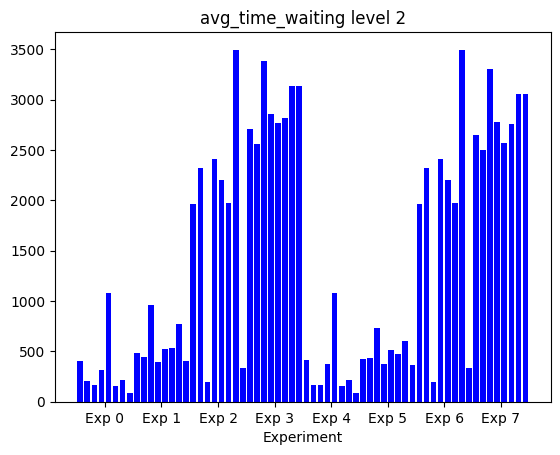

[np.float64(72.91570106454563), np.float64(75.69206537600621), np.float64(562.7544158087475), np.float64(145.83671539449864), np.float64(102.45078911447558), np.float64(78.65175315079114), np.float64(80.01715214129274), np.float64(75.02719534496839), np.float64(77.91570106454563), np.float64(85.69206537600621), np.float64(129.77695969196398), np.float64(153.83671539449864), np.float64(114.95078911447558), np.float64(78.65175315079114), np.float64(81.01715214129274), np.float64(76.15254365874114), np.float64(72.91570106454563), np.float64(75.69206537600621), np.float64(4304.747627488232), np.float64(145.83671539449864), np.float64(110.95078911447558), np.float64(93.65175315079114), np.float64(80.01715214129274), np.float64(77.80137866684379), np.float64(6541.981296221836), np.float64(83.69206537600621), np.float64(129.77695969196398), np.float64(153.83671539449864), np.float64(111.05112426539745), np.float64(5306.193624608323), np.float64(81.01715214129274), np.float64(79.47696116279246

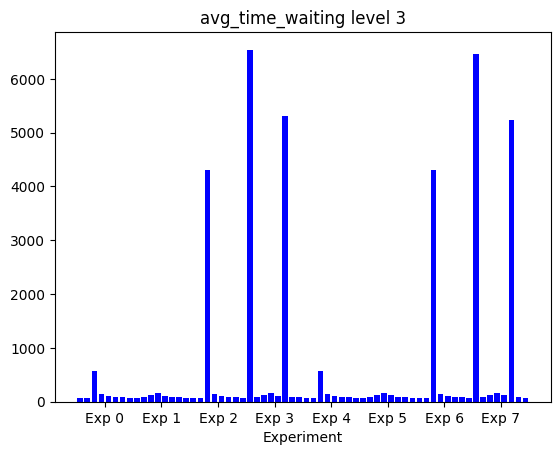

In [16]:
def plot_patient_stat(stat_name, level):
    if level == 0:
        level_title = "all"
    else:
        level_title = level
    values = []
    for i, exp in enumerate(patient_results):
        for j, patient in enumerate(exp):
            values.append(patient[level][stat_name])

    print(values)
    print(len(values))

    labels = ["Exp " + str(x) for x in range(8)]
    # colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    x = np.arange(len(values))
    plt.bar(x, values, color="blue")
    plt.xticks(ticks=np.arange(3.5, len(values), 8), labels=labels)

    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name + " level " + str(level_title))

    # Show the chart
    plt.show()

for i in range(4):
    plot_patient_stat("total_time_waiting", i)

for i in range(4):
    plot_patient_stat("avg_time_waiting", i)

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[142.0, 235.65676902744008, 360.0, 377.4558322987368, 643.2976700162062, 0, 600.0, 0, 172.0, 263.6567690274401, 342.0, 363.4558322987368, 657.2976700162062, 0, 632.0, 0]


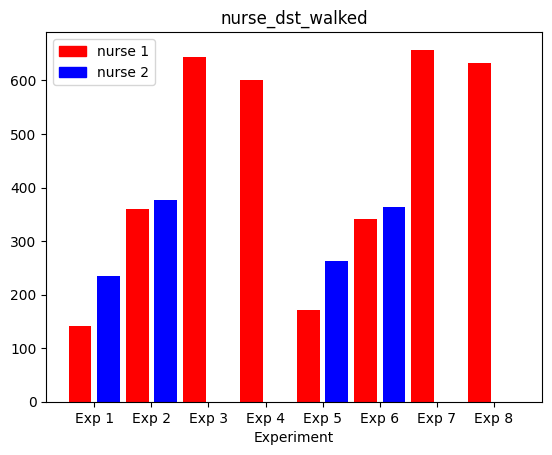

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(142.0), np.float64(235.6567690274403), np.float64(360.0), np.float64(377.4558322987368), np.float64(643.2976700162062), 0, np.float64(600.0), 0, np.float64(172.0), np.float64(263.6567690274403), np.float64(342.0), np.float64(363.4558322987368), np.float64(657.2976700162062), 0, np.float64(632.0), 0]


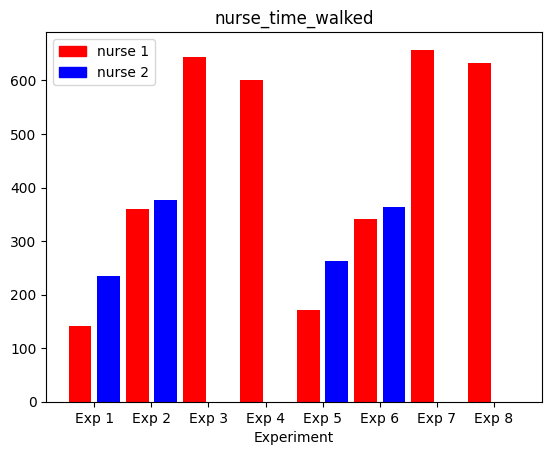

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(3267.419399976401), np.float64(2696.7678618967393), np.float64(1743.6314195284147), np.float64(1475.5412405725529), np.float64(5964.1872618731395), 0, np.float64(5964.187261873143), 0, np.float64(3267.419399976401), np.float64(2696.7678618967393), np.float64(1811.0541569533555), np.float64(1522.743043702877), np.float64(5964.1872618731395), 0, np.float64(5964.187261873141), 0]


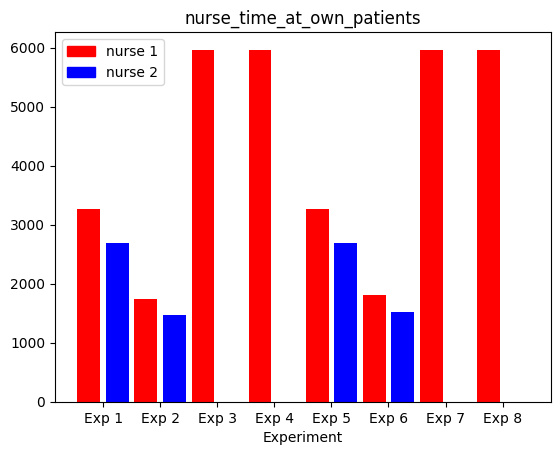

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[0, 0, np.float64(1221.2266213241862), np.float64(1523.7879804479867), 0, 0, 0, 0, 0, 0, np.float64(1174.0248181938616), np.float64(1456.3652430230459), 0, 0, 0, 0]


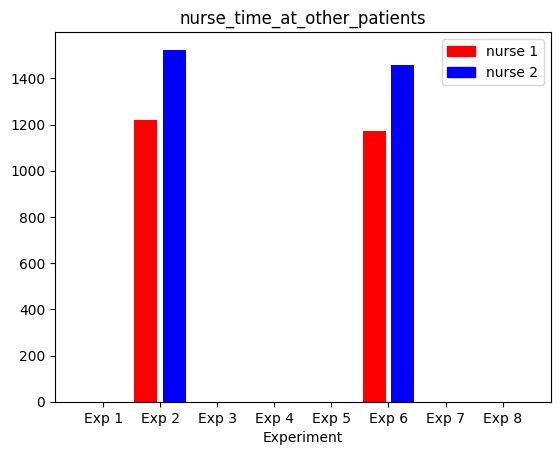

['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7', 'Exp 8']
[np.float64(448.0361894299999), np.float64(925.0309584822214), np.float64(252.7634454977824), np.float64(200.8364330311074), np.float64(569.2581301182563), 0, np.float64(254.44217506849873), 0, np.float64(418.0361894299999), np.float64(897.0309584822214), np.float64(250.54251120316712), np.float64(235.0573673257245), np.float64(562.2581301182563), 0, np.float64(147.56803224981286), 0]


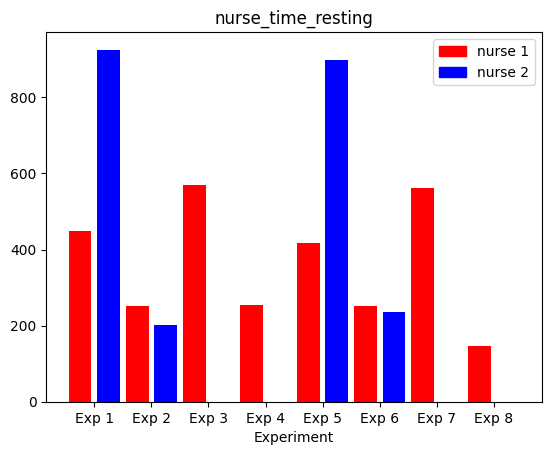

In [17]:
def plot_nurse_stat(stat_name):
    values = []
    for res in nurse_results:
        values.append(res[0][stat_name])
        if len(res) == 2:
            values.append(res[1][stat_name])
        else:
            values.append(0)

    labels = ["Exp " + str(x + 1) for x in range(8)]
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    print(labels)
    print(values)
    x = np.arange(len(values))

    plt.bar(x, values, color=colors)

    plt.xticks(ticks=np.arange(0.5, len(values), 2), labels=labels)

    # red_patch = plt.Line2D([0], [0], color='red', lw=4, label='nurse 1')
    # blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='nurse 2')
    red_patch = mpatches.Circle((0, 0), radius=0.1, color='red', label='nurse 1')
    blue_patch = mpatches.Circle((0, 0), radius=0.1, color='blue', label='nurse 2')
    plt.legend(handles=[red_patch, blue_patch])

    # Customize chart
    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name)

    # Show the chart
    plt.show()

nurse_stats = nurse_results[0][0].keys()
for stat in nurse_stats:
    plot_nurse_stat(stat)

## Test prints

In [14]:
df = pd.read_csv(project_root + "/output/testNurseLog.csv")
df

,time,nurse,x,y,event,action,patient
0,0.000000,0,3.0,3.0,131,assign event,0.0
1,3.000000,0,6.0,3.0,131,move to,0.0
2,7.000000,0,6.0,7.0,131,move to,0.0
3,10.000000,0,3.0,7.0,131,move to,0.0
4,25.027670,0,3.0,7.0,131,unassign event,0.0
...,...,...,...,...,...,...,...
645,8401.562386,0,3.0,7.0,164,assign event,NaN
646,8404.562386,0,6.0,7.0,164,move to,NaN
647,8408.562386,0,6.0,3.0,164,move to,NaN
648,8411.562386,0,3.0,3.0,164,move to,NaN


In [17]:
time_rows = df[(df['nurse'] == 0) & (df['patient'] == 0) & (df['action'] == "time at patient")].event.tolist()
time_rows


[82, 131, 81, 79, 139, 75, 80, 78, 76, 77, 74]

In [18]:
df115 = df[df['event'] == 82].reset_index(drop=True)
df115

,time,nurse,x,y,event,action,patient
0,167.996388,0,3.0,7.0,82,assign event,0.0
1,266.406885,0,3.0,7.0,82,time at patient,0.0
2,266.406885,0,3.0,7.0,82,finish event,0.0


In [19]:
# Find the index of the row where action is 'time at patient'
time_at_patient_idx = df115[df115['action'] == 'time at patient'].index[0]
print(time_at_patient_idx)

total_time = 0
int_end_time = df115.loc[time_at_patient_idx].time #end of current calculated interval
# Iterate backward from this index to find the first occurrence of 'move to'
for idx in range(time_at_patient_idx, -1, -1):
    line = df115.loc[idx]
    action = line["action"]
    if action == 'move to' or idx == 0:
        total_time += int_end_time - line["time"]
        break
    if action == 'assign event':
        total_time += int_end_time - line["time"]
    elif action == 'unassign event':
        int_end_time = line["time"]
    print(idx, action, total_time)

print(total_time)

1
1 time at patient 0
98.41049763255538


In [29]:
df115.iloc[-1]

time        2928.664217
nurse                 0
x                  14.0
y                   3.0
event               115
action     finish event
patient             5.0
Name: 210, dtype: object

In [22]:
req_levels = [2, 3]
level_probabilities = [0.75, 0.25]
level = np.random.choice(req_levels, p=level_probabilities)
req = {}
req["level"] = level

print(req["level"])

2


In [26]:
val = np.int64(2)
print(type(int(val)))

<class 'int'>
